# ARAR Model


The ARAR model applies a memory-shortening transformation if the underlying process of a given time series ${Y_{t}, t = 1, 2, ..., n}$ is "long-memory" then it fits an autoregressive model.

## Memory Shortening

The model follows five steps to classify ${Y_{t}}$ and take one of the following three actions:


* L: declare ${Y_{t}}$ as long memory and form  ${Y_{t}}$ by ${\tilde{Y}_{t} = Y_{t} - \hat{\phi}Y_{t - \hat{\tau}}}$
* M: declare ${Y_{t}}$ as moderately long memory and form  ${Y_{t}}$ by ${\tilde{Y}_{t} = Y_{t} - \hat{\phi}_{1}Y_{t -1} - \hat{\phi}_{2}Y_{t -2}}$
* S: declare ${Y_{t}}$ as short memory.

If ${Y_{t}}$ declared to be $L$ or $M$ then the series ${Y_{t}}$ is transformed again until. The transformation process continuous until the transformed series is classified as short memory. However, the maximum number of transformation process is three, it is very rare a time series require more than 2.

* 1. For each $\tau = 1, 2, ..., 15$, we find the value $\hat{\phi(\tau)} $ of $\hat{\phi}$ that minimizes $ERR(\phi, \tau) = \frac{\sum_{t=\tau +1 }^{n} [Y_{t} - \phi Y_{t-\tau}]^2 }{\sum_{t=\tau +1 }^{n} Y_{t}^{2}}$ then define $Err(\tau) = ERR(\hat{\phi(\tau), \tau})$ and choose the lag $\hat{\tau}$ to be the value of $\tau$ that minimizes  $Err(\tau)$.
* 2. If $Err(\hat{\tau}) \leq  8/n$,  ${Y_{t}}$ is a long-memory series.
* 3. If $\hat{\phi}( \hat{\tau} ) \geq 0.93$ and $\hat{\tau} > 2$,  ${Y_{t}}$ is a long-memory series.
* 4. If $\hat{\phi}( \hat{\tau} ) \geq 0.93$ and $\hat{\tau} = 1$ or $2$, ${Y_{t}}$ is a long-memory series.
* 5. If $\hat{\phi}( \hat{\tau} ) < 0.93$, ${Y_{t}}$ is a short-memory series.


## Subset Autoregressive Model:

In the following we will describe how ARAR algorithm fits an autoregressive process to the mean-corrected series $X_{t} = S_{t}- {\bar{S}}$, $t = k+1, ..., n$ where ${S_{t}, t = k + 1, ..., n}$ is the memory-shortened version of  ${Y_{t}}$ which derived from the five steps we described above and $\bar{S}$ is the sample mean of $S_{k+1}, ..., S_{n}$.

The fitted model has the following form:

$X_{t} = \phi_{1}X_{t-1} + \phi_{1}X_{t-l_{1}} + \phi_{1}X_{t- l_{1}} + \phi_{1}X_{t-l_{1}} + Z$

where $Z \sim WN(0, \sigma^{2})$. The coefficients $\phi_{j}$ and white noise variance $\sigma^2$ can be derived from the Yule-Walker equations for given lags $l_1, l_2,$ and $l_3$ :

$$
\small
\begin{bmatrix}
1 & \hat{\rho}(l_1 - 1) & \hat{\rho}(l_2 - 1) & \hat{\rho}(l_3 - 1)\\
\hat{\rho}(l_1 - 1) &1 & \hat{\rho}(l_2 - l_1) & \hat{\rho}(l_3 - l_1)\\
\hat{\rho}(l_2 - 1) & \hat{\rho}(l_2 - l_1) & 1 & \hat{\rho}(l_2 - l_2)\\
\hat{\rho}(l_3 - 1) & \hat{\rho}(l_3 - l_1) & \hat{\rho}(l_3 - l_1) & 1
\end{bmatrix}
\; \ast \;
\begin{bmatrix}
\phi_{1} \\
\phi_{l_1} \\
\phi_{l_2}\\
\phi_{l_3}
\end{bmatrix} 
= 
\begin{bmatrix} 
\hat{\rho}(1) \\ 
\hat{\rho}(l_1) \\ 
\hat{\rho}(l_2)\\ 
\hat{\rho}(l_3) 
\end{bmatrix}
$$

and $\sigma^2 = \hat{\gamma}(0) [1-\phi_1\hat{\rho}(1)] - \phi_{l_1}\hat{\rho}(l_1)] - \phi_{l_2}\hat{\rho}(l_2)] - \phi_{l_3}\hat{\rho}(l_3)]$, where $\hat{\gamma}(j)$ and $\hat{\rho}(j), j = 0, 1, 2, ...,$ are the sample autocovariances and autocorelations of the series $X_{t}$.

The algorithm computes the coefficients of $\phi(j)$ for each set of lags where $1<l_1<l_2<l_3 \leq m$ where m chosen to be 13 or 26. The algorithm selects the model that the Yule-Walker estimate of $\sigma^2$ is minimal.

## Forecasting

If short-memory filter found in first step it has coefficients $\Psi_0, \Psi_1, ..., \Psi_k (k \geq0)$ where $\Psi_0 = 1$. In this case the transforemed series can be expressed as
\begin{equation}
    S_t = \Psi(B)Y_t = Y_t + \Psi_1 Y_{t-1} + ...+ \Psi_k Y_{t-k},
\end{equation}
where $\Psi(B) = 1 + \Psi_1B + ...+ \Psi_k B^k$ is polynomial in the back-shift operator.

If the coefficients of the subset autoregression found in the second step it has coefficients $\phi_1, \phi_{l_1},  \phi_{l_2}$ and $\phi_{l_3}$ then the subset AR model for $X_t = S_t - \bar{S}$ is

\begin{equation}
    \phi(B)X_t = Z_t,
\end{equation}

where $Z_t$ is a white-noise series with zero mean and constant variance and $\phi(B) = 1 - \phi_1B - \phi_{l_1}B^{l_1} - \phi_{l_2}B^{l_2} - \phi_{l_3}B^{l_3}$. From equation (1) and (2) one can obtain

\begin{equation}
    \xi(B)Y_t = \phi(1)\bar{S} + Z_t,
\end{equation}
where $\xi (B) = \Psi(B)\phi(B)$.

Assuming the fitted model in equation (3) is an appropriate model, and $Z_t$ is uncorrelated with $Y_j, j <t$ $\forall t \in T$, one can determine minimum mean squared error linear predictors $P_n Y_{n + h}$ of $Y_{n+h}$ in terms of ${1, Y_1, ..., Y_n}$ for $n > k + l_3$, from recursions

\begin{equation}
    P_n Y_{n+h} = - \sum_{j = 1}^{k + l_3} \xi P_nY_{n+h-j} + \phi(1)\bar{S},  h\geq 1,
\end{equation}
with the initial conditions $P_n Y_{n+h} = Y_{n + h}$, for $h\leq0$.

Ref: Brockwell, Peter J, and Richard A. Davis. Introduction to Time Series and Forecasting. [Springer](https://link.springer.com/book/10.1007/978-3-319-29854-2) (2016)

<div role="note"
     style="background: rgba(16,142,233,0.1); border-left: 4px solid #1890ff;
            border-radius: 4px; padding: 10px 14px; margin: 1em 0;">
  <p style="display:flex; align-items:center; font-size:1rem; color:#1890ff;
            margin:0 0 6px 0; font-weight:500;">
    <span style="margin-right:6px; font-size:18px;">ℹ️</span> Note
  </p>

  <p style="margin:0; color:inherit;">
  
  The python implementation of the ARAR algorithm in skforecast is based on the Julia package <a href="https://taf-society.github.io/Durbyn.jl/dev/">Durbyn.jl</a> develop by Resul Akay.

</div>

## Libraries and data

In [1]:
# Libraries
# ==============================================================================
import matplotlib.pyplot as plt
from skforecast.stats import Arar
from skforecast.recursive import ForecasterStats
from skforecast.model_selection import TimeSeriesFold, backtesting_stats
from skforecast.datasets import fetch_dataset
from skforecast.plot import set_dark_theme

In [2]:
# Download data
# ==============================================================================
data = fetch_dataset(name='fuel_consumption', raw=False)
data = data.loc[:'1990-01-01 00:00:00']
y = data['Gasolinas'].rename('y').rename_axis('date')
y

╭──────────────────────────────── fuel_consumption ────────────────────────────────╮
│ Description:                                                                     │
│ Monthly fuel consumption in Spain from 1969-01-01 to 2022-08-01.                 │
│                                                                                  │
│ Source:                                                                          │
│ Obtained from Corporación de Reservas Estratégicas de Productos Petrolíferos and │
│ Corporación de Derecho Público tutelada por el Ministerio para la Transición     │
│ Ecológica y el Reto Demográfico. https://www.cores.es/es/estadisticas            │
│                                                                                  │
│ URL:                                                                             │
│ https://raw.githubusercontent.com/skforecast/skforecast-                         │
│ datasets/main/data/consumos-combustibles-mensual.csv                             │
│                                                                                  │
│ Shape: 644 rows x 5 columns                                                      │
╰──────────────────────────────────────────────────────────────────────────────────╯

date
1969-01-01    166875.2129
1969-02-01    155466.8105
1969-03-01    184983.6699
1969-04-01    202319.8164
1969-05-01    206259.1523
                 ...     
1989-09-01    687649.2852
1989-10-01    669889.1602
1989-11-01    601413.8867
1989-12-01    663568.1055
1990-01-01    610241.2461
Freq: MS, Name: y, Length: 253, dtype: float64

## ARAR

**Skforecast** provides the class [`ARAR`](https://skforecast.org/latest/api/stats#arar) to facilitate the implementation of ARAR models in Python, allowing users to easily fit and forecast time series data using this approach.

In [3]:
# ARAR model
# ==============================================================================
model = Arar()
model.fit(y)

Arar(max_ar_depth=26, max_lag=40)

Once de model is fitted, future observations can be forecasted using the `predict` and `predict_interval` methods.

In [4]:
# Prediction
# ==============================================================================
model.predict(steps=10)

array([576270.29065713, 711350.90294941, 645064.14251878, 699974.70526107,
       693641.4876215 , 813391.3131971 , 849840.34223407, 728834.11322404,
       698899.25161967, 640834.1450568 ])

In [5]:
# Prediction interval
# ==============================================================================
model.predict_interval(steps=10, level=[95])

,mean,lower_95,upper_95
step,,,
1,576270.290657,535285.283204,617255.298110
2,711350.902949,669971.979006,752729.826893
3,645064.142519,597182.272797,692946.012240
4,699974.705261,651641.922678,748307.487844
5,693641.487621,643148.019307,744134.955936
6,813391.313197,762568.607694,864214.018700
7,849840.342234,798207.532180,901473.152288
8,728834.113224,677001.238600,780666.987848
9,698899.251620,646741.565713,751056.937527


## ForecasterStats

The previous section introduced the construction of ARAR models. In order to seamlessly integrate these models with the various functionalities provided by **skforecast**, the next step is to encapsulate the skforecast [`ARAR`](https://skforecast.org/latest/api/stats#arar) model within a [`ForecasterStats`](https://skforecast.org/latest/api/forecasterstats) object. This encapsulation harmonizes the intricacies of the model and allows for the coherent use of skforecast's extensive capabilities.

In [6]:
# Create and fit ForecasterStats
# ==============================================================================
forecaster = ForecasterStats(estimator=Arar())
forecaster.fit(y=y)
forecaster

=============== 
ForecasterStats 
=============== 
Estimator: Arar(max_ar_depth=26, max_lag=40) 
Series name: y 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Training range: [Timestamp('1969-01-01 00:00:00'), Timestamp('1990-01-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Estimator parameters: {'max_ar_depth': 26, 'max_lag': 40, 'safe': True} 
fit_kwargs: {} 
Creation date: 2025-11-26 15:05:12 
Last fit date: 2025-11-26 15:05:12 
Index seen by the forecaster: DatetimeIndex(['1969-01-01', '1969-02-01', '1969-03-01', '1969-04-01',
               '1969-05-01', '1969-06-01', '1969-07-01', '1969-08-01',
               '1969-09-01', '1969-10-01',
               ...
               '1989-04-01', '1989-05-01', '1989-06-01', '1989-07-01',
               '1989-08-01', '1989-09-01', '1989-10-01', '1989-11-01',
               '1989-12-01', '1990-01-01'],
              dtype='datetime64[ns]', name='date', length=253, freq='MS') 
Skforecast version: 0.19.0 
Python version: 3.12.11 
Forecaster id: None

In [7]:
# Feature importances
# ==============================================================================
forecaster.get_feature_importances()

,feature,importance
0,lag_2,0.568527
1,lag_14,0.318155
2,lag_1,0.138978
3,lag_12,-0.351038


## Prediction

In [8]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=10)
predictions.head(3)

1990-02-01    576270.290657
1990-03-01    711350.902949
1990-04-01    645064.142519
Freq: MS, Name: pred, dtype: float64

In [9]:
# Predict intervals
# ==============================================================================
predictions = forecaster.predict_interval(steps=36, alpha=0.05)
predictions.head(3)

,pred,lower_bound,upper_bound
1990-02-01,576270.290657,535285.283204,617255.298110
1990-03-01,711350.902949,669971.979006,752729.826893
1990-04-01,645064.142519,597182.272797,692946.012240


## Backtesting

ARAR and other statistical models, once integrated in a [`ForecasterStats`](https://skforecast.org/latest/api/forecasterstats) object, can be evaluated using any of the [backtesting strategies](../introduction-forecasting/introduction-forecasting.html#backtesting-forecasting-models) implemented in skforecast.

In [10]:
# Backtesting
# ==============================================================================
cv = TimeSeriesFold(
    initial_train_size = 150,
    steps              = 12,
    refit              = True,
)

metric, predictions = backtesting_stats(
    y               = y,
    forecaster      = forecaster,
    cv              = cv,
    interval        = [2.5, 97.5],
    metric          = 'mean_absolute_error',
    verbose         = False
)

  0%|          | 0/9 [00:00<?, ?it/s]

In [11]:
# Backtest predictions
# ==============================================================================
predictions.head(4)

,fold,pred,lower_bound,upper_bound
1981-07-01,0,585006.456464,548872.543529,621140.369400
1981-08-01,0,632872.256680,596247.977571,669496.535788
1981-09-01,0,515431.057548,474418.134356,556443.980739
1981-10-01,0,523423.286271,481982.529292,564864.043250


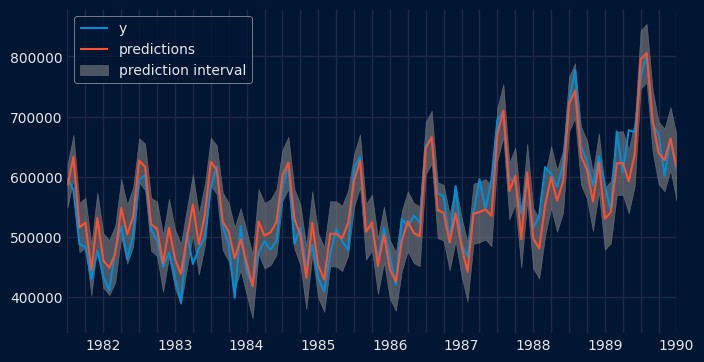

In [12]:
# Plot predictions
# ==============================================================================
set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 4))
y.loc[predictions.index].plot(ax=ax, label='y')
predictions['pred'].plot(ax=ax, label='predictions')
ax.fill_between(
        predictions.index,
        predictions['lower_bound'],
        predictions['upper_bound'],
        label='prediction interval',
        color='gray',
        alpha=0.6,
        zorder=1
    )
plt.legend()
plt.show()